In [14]:
import os
import winsound

import librosa
import librosa.display
import IPython.display

import matplotlib.pyplot as plt
import numpy as np
import IPython.display as ipd
%matplotlib inline

In [2]:
# path 정보 확인
print(os.getcwd())

target_path = "d:\GH\Audio\dataset\소리인식\분류완료\Drager evita V300"
print(target_path)

d:\GH\Audio\DSP
d:\GH\Audio\dataset\소리인식\분류완료\Drager evita V300


In [4]:
filename = os.path.join(target_path, 'V300 high priority alarm 01.wav')
y, sr = librosa.load(filename, sr=22050, mono=True)

print(y, sr)
print(y.shape, sr)

[-0.0050725  -0.0089544  -0.01045418 ...  0.          0.
  0.        ] 22050
(94723,) 22050


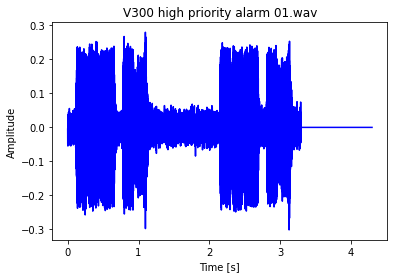

In [7]:
time = np.linspace(0, len(y)/sr, len(y)) # time axis

fig, ax1 = plt.subplots() # plot
ax1.plot(time, y, color = 'b', label='speech waveform')
ax1.set_ylabel("Amplitude") # y 축
ax1.set_xlabel("Time [s]") # x 축
plt.title('V300 high priority alarm 01.wav') # 제목
plt.show()

In [5]:
def non_zero(data):
    idx = np.where(data != 0)[0]
    my_wants = idx[-1]
    return data[:(my_wants+1)]

In [6]:
None_zero_y = non_zero(y)
print(y.shape)
print(None_zero_y.shape)

(94723,)
(72737,)


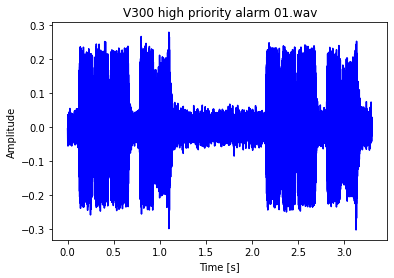

In [8]:
time = np.linspace(0, len(None_zero_y)/sr, len(None_zero_y)) # time axis

fig, ax1 = plt.subplots() # plot
ax1.plot(time, None_zero_y, color = 'b', label='speech waveform')
ax1.set_ylabel("Amplitude") # y 축
ax1.set_xlabel("Time [s]") # x 축
plt.title('V300 high priority alarm 01.wav') # 제목
plt.show()

# 오디오 파일 이해하기

- y: 소리가 떨리는 세기(진폭)를 시간 순서대로 나열한 것
- Sampling rate: 1초당 샘플의 개수, 단위 Hz

In [12]:
print(len(y))
print('Sampling rate (Hz): %d' % sr)
print('Audio length (seconds): %.2f' % (len(y) / sr))

print(len(None_zero_y))
print('Sampling rate (Hz): %d' % sr)
print('Cutting Audio length (seconds): %.2f' % (len(None_zero_y) / sr))

94723
Sampling rate (Hz): 22050
Audio length (seconds): 4.30
72737
Sampling rate (Hz): 22050
Cutting Audio length (seconds): 3.30


## 2D 음파 그래프

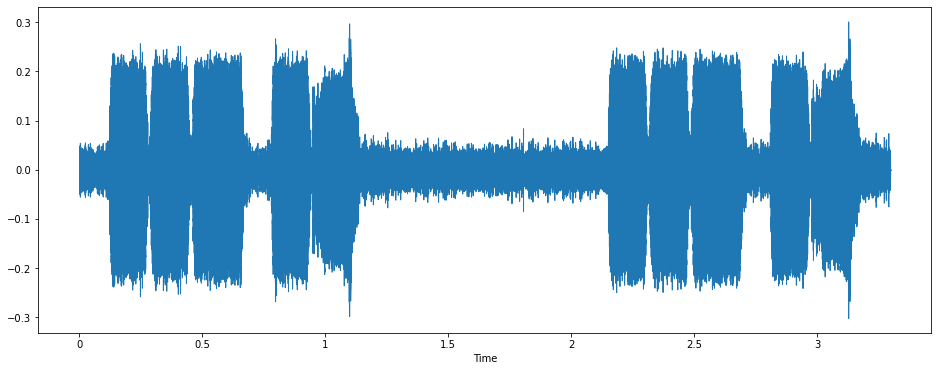

In [19]:
plt.figure(figsize=(16, 6))
# AttributeError: module 'librosa.display' has no attribute 'waveplot'
librosa.display.waveshow(y=None_zero_y, sr=sr)
plt.show()

## Fourier Transform

- 시간 영역 데이터를 주파수 영역으로 변경
- y축: 주파수 (로그 스케일)
- color축: 데시벨 (진폭)

(1025, 72)


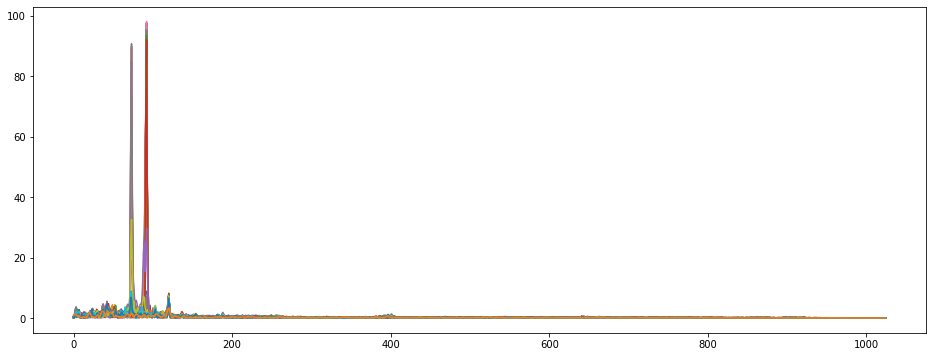

In [22]:
D = np.abs(librosa.stft(None_zero_y, n_fft=2048, hop_length=1024))

print(D.shape)

plt.figure(figsize=(16, 6))
plt.plot(D)
plt.show()

## Spectogram

- 시간에 따른 신호 주파수의 스펙트럼 그래프
- 다른 이름: Sonographs, Voiceprints, Voicegrams

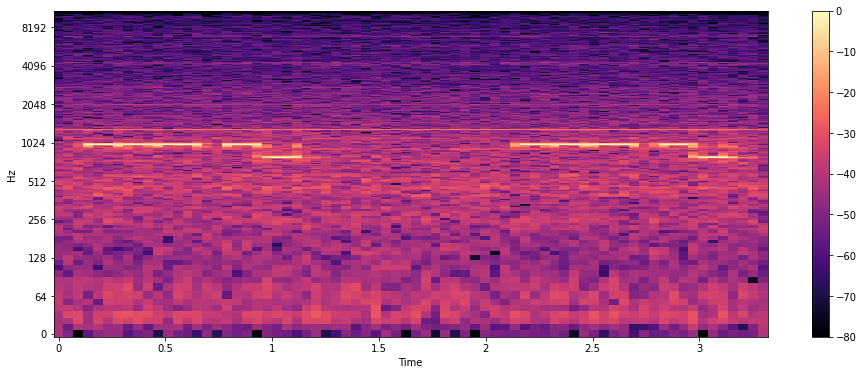

In [23]:
DB = librosa.amplitude_to_db(D, ref=np.max)

plt.figure(figsize=(16, 6))
librosa.display.specshow(DB, sr=sr, hop_length=1024, x_axis='time', y_axis='log')
plt.colorbar()
plt.show()

## Mel Spectogram

- (인간이 이해하기 힘든) Spectogram의 y축을 Mel Scale로 변환한 것 (Non-linear transformation)

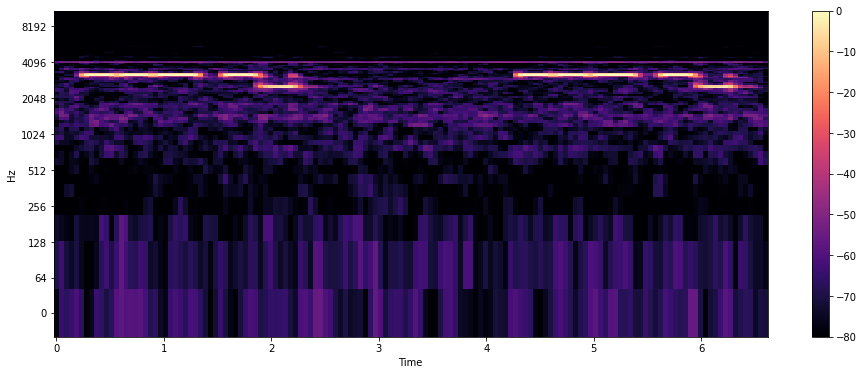

In [25]:
S = librosa.feature.melspectrogram(y=None_zero_y, sr=sr)
S_DB = librosa.amplitude_to_db(S, ref=np.max)

plt.figure(figsize=(16, 6))
librosa.display.specshow(S_DB, sr=sr, hop_length=1024, x_axis='time', y_axis='log')
plt.colorbar()
plt.show()

# 오디오 특성 추출 (Audio Feature Extraction)

In [27]:
# tempo (BPM)
tempo, _ = librosa.beat.beat_track(y=None_zero_y, sr=sr)
print(tempo)

112.34714673913044


In [28]:
# Zero Crossing Rate
# 음파가 양에서 음으로 또는 음에서 양으로 바뀌는 비율
zero_crossings = librosa.zero_crossings(y=None_zero_y, pad=False)

print(zero_crossings)
print(sum(zero_crossings))

[False False False ...  True  True  True]
7690


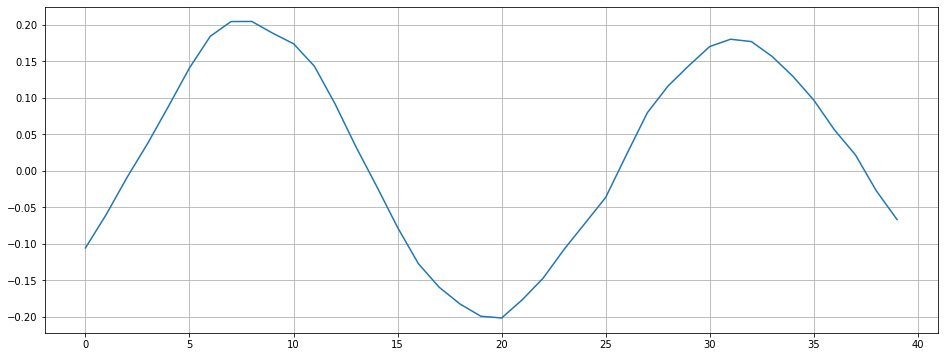

In [29]:
n0 = 9000
n1 = 9040

plt.figure(figsize=(16, 6))
plt.plot(None_zero_y[n0:n1])
plt.grid()
plt.show()

In [30]:
zero_crossings = librosa.zero_crossings(None_zero_y[n0:n1], pad=False)
print(sum(zero_crossings))

4


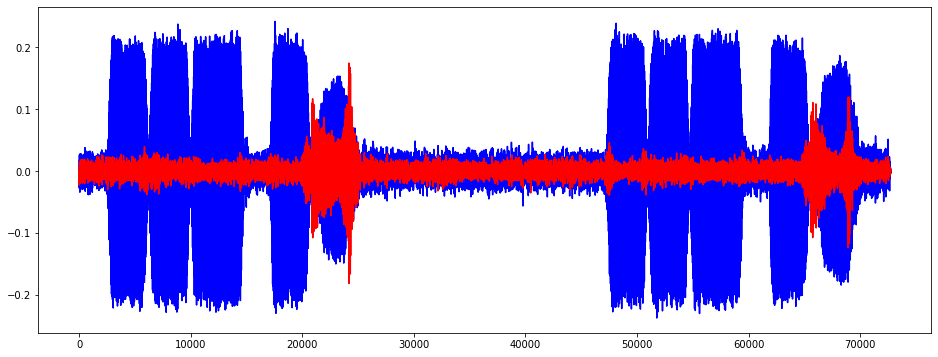

In [31]:
# Harmonic and Percussive Components
# Harmonics: 사람의 귀로 구분할 수 없는 특징들 (음악의 색깔)
# Percussives: 리듬과 감정을 나타내는 충격파
y_harm, y_perc = librosa.effects.hpss(None_zero_y)

plt.figure(figsize=(16, 6))
plt.plot(y_harm, color='b')
plt.plot(y_perc, color='r')
plt.show()

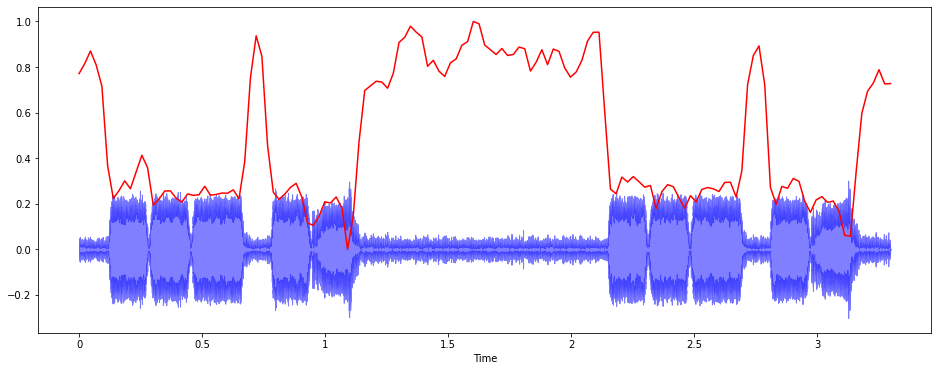

In [33]:
# Spectral Centroid
# - 소리를 주파수 표현했을 때, 주파수의 가중평균을 계산하여 소리의 "무게 중심"이 어딘지를 알려주는 지표
# - 예를 들어, 블루스 음악은 무게 중심이 가운데 부분에 놓여있는 반면, 메탈 음악은 (끝 부분에서 달리기 때문에) 노래의 마지막 부분에 무게 중심이 실린다

spectral_centroids = librosa.feature.spectral_centroid(y=None_zero_y, sr=sr)[0]

# Computing the time variable for visualization
frames = range(len(spectral_centroids))

# Converts frame counts to time (seconds)
t = librosa.frames_to_time(frames)

import sklearn
def normalize(x, axis=0):
  return sklearn.preprocessing.minmax_scale(x, axis=axis)

plt.figure(figsize=(16, 6))
librosa.display.waveshow(y=None_zero_y, sr=sr, alpha=0.5, color='b')
plt.plot(t, normalize(spectral_centroids), color='r')
plt.show()

(143,)


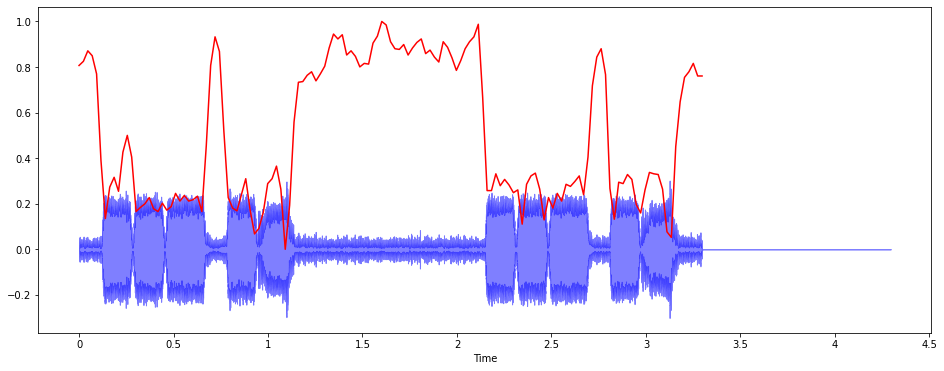

In [36]:
# Spectral Rolloff
# 신호 모양을 측정한다
# 총 스펙트럴 에너지 중 낮은 주파수(85% 이하)에 얼마나 많이 집중되어 있는가

spectral_rolloff = librosa.feature.spectral_rolloff(y=None_zero_y, sr=sr)[0]
print(spectral_rolloff.shape)

plt.figure(figsize=(16, 6))
librosa.display.waveshow(y, sr=sr, alpha=0.5, color='b')
plt.plot(t, normalize(spectral_rolloff), color='r')
plt.show()

mean: 0.50
var: 0.05


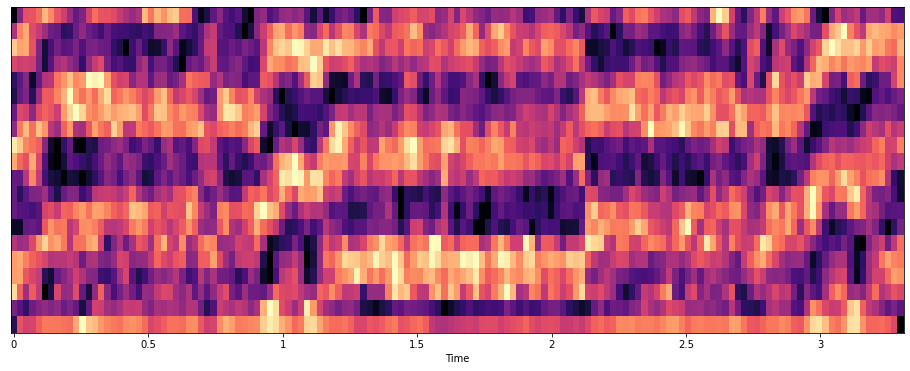

In [37]:
# Mel-Frequency Cepstral Coefficients (MFCCs)

mfccs = librosa.feature.mfcc(y=None_zero_y, sr=sr)
mfccs = normalize(mfccs, axis=1)

print('mean: %.2f' % mfccs.mean())
print('var: %.2f' % mfccs.var())

plt.figure(figsize=(16, 6))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')
plt.show()

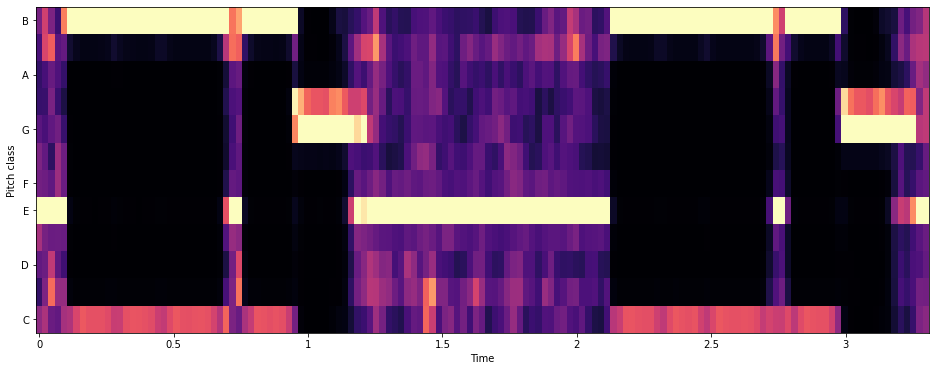

In [38]:
# Chroma Frequencies
# 크로마 특징은 음악의 흥미롭고 강렬한 표현이다
# 크로마는 인간 청각이 옥타브 차이가 나는 주파수를 가진 두 음을 유사음으로 인지한다는 음악이론에 기반한다
# 모든 스펙트럼을 12개의 Bin으로 표현한다
# 12개의 Bin은 옥타브에서 12개의 각기 다른 반음(Semitones=Chroma)을 의미한다

chromagram = librosa.feature.chroma_stft(y=None_zero_y, sr=sr, hop_length=512)

plt.figure(figsize=(16, 6))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=512)
plt.show()